In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [2]:
strategy=pd.read_csv('FCM_Problems_and_Strategies_with_labels8.csv')

In [3]:
problem=pd.read_csv('FCM_Problems_and_Strategies_with_labels_6.csv')
problem=problem.loc[:,['ID','Problem','Problem_Label']]
problem['Strategy']=strategy['Strategy']
problem['Strategy_Label']=strategy['Strategy_Label']
full=problem
full.shape

(4039, 5)

In [4]:
full.head()

,ID,Problem,Problem_Label,Strategy,Strategy_Label
0,77th 1-16-40-2,wants to expunge her record,Emotion/behavior issues,cm will contact past employers with client to ...,mentoring/support
1,77th 1-16-45-1,employment related issue,Employment issues,speak to teacher about mother and refer client...,job/school readiness
2,77th 1-16-47-2,has poor grades and want to get better grades,Emotion/behavior issues,cm will work on getting tutoring services alon...,mentoring/support
3,77th 1-16-50-2,client don't believe in herself,Emotion/behavior issues,to mentor client with basic life skills and se...,anger manage/lifeskill
4,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotion/behavior issues,referred him to in-house services through sea ...,mentoring/support


In [5]:
score=pd.read_csv('full_embeddedness.csv')

In [6]:
df = pd.merge(left=full, right=score, left_on='ID', right_on='ID',how='inner')
df=df.drop_duplicates()

In [7]:
df.loc[df['Problem_Label'] == 'Need assistance with school enrollment/improving school grades', 'Problem_Label'] = 'school-related issues'

In [8]:
df.loc[df['Problem_Label'] == 'Need to complete community service hours for probation requirements', 'Problem_Label'] = 'probation-related issues'

In [9]:
df.loc[df['Problem_Label'] == 'Need work ready documents/California id', 'Problem_Label'] = 'Lack work documents/CA ID'

In [10]:
df.loc[df['Problem_Label'] == 'Need assistance with employment search', 'Problem_Label'] = 'employment-related issues'

In [11]:
df.loc[df['Problem_Label'] == 'Need mentoring from CM/CIW to navagate interpersonal relationships', 'Problem_Label'] = 'interpersonal relationship issues'

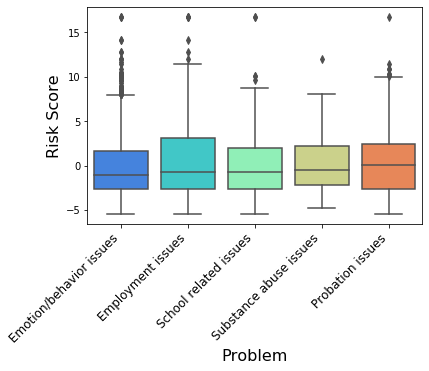

In [23]:
ch=sns.boxplot(x='Problem_Label',y='risk',data=df,palette='rainbow')
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xticks(fontsize=12)
plt.xlabel('Problem', fontsize=16)
plt.ylabel('Risk Score', fontsize=16)
plt.savefig('Problem_score.pdf',bbox_inches = 'tight') 

In [13]:
df.loc[df['Problem_Label'] == 'Need mentoring from CM/CIW to navagate interpersonal relationships', 'Problem_Label'] = 'interpersonal relationship issues'

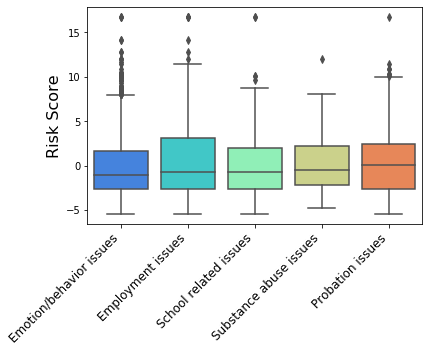

In [26]:
ch=sns.boxplot(x='Problem_Label',y='risk',data=df,palette='rainbow')
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Risk Score', fontsize=16)
plt.savefig('Problem_score.pdf',bbox_inches = 'tight') 

In [15]:
df.to_csv('problem,strategy.csv', index = False)

In [16]:
df.shape

(3057, 13)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

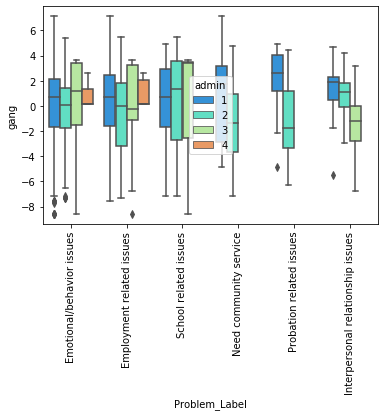

In [17]:
sns.boxplot(x='Problem_Label',y='gang',data=df,hue='admin',palette='rainbow')
plt.xticks(rotation=90)